In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from desilike.samples import Profiles, Chain, plotting
from emulator_fit import get_power_likelihood

profiles_complete = Profiles.load('profiles_shapefit_complete_NGC/power_velocileptors.npy')
profiles = Profiles.load('profiles_shapefit_NGC/power_velocileptors.npy')
profiles_fc = Profiles.load('profiles_shapefit_NGC/power_velocileptors_fc.npy')

In [2]:
print(profiles_complete.to_stats(tablefmt='pretty'))
print(profiles.to_stats(tablefmt='pretty'))
print(profiles_fc.to_stats(tablefmt='pretty'))

+-------------+--------+---------+-------+
| chi2 = 3.70 | varied | bestfit | error |
+-------------+--------+---------+-------+
|    qpar     |  True  |  0.995  | 0.014 |
|    qper     |  True  |  1.005  | 0.011 |
|     dm      |  True  | -0.014  | 0.052 |
|     df      |  True  |  1.034  | 0.051 |
|     b1      |  True  |  0.205  | 0.040 |
|     b2      |  True  |  -1.8   |  1.3  |
|     bs      |  True  |   0.8   |  2.4  |
|   alpha0    |  True  |   7.5   |       |
|   alpha2    |  True  |   6.7   |       |
|   alpha4    |  True  |  -2.9   |       |
|     sn0     |  True  |  -130   |       |
|     sn2     |  True  |  -8500  |       |
|     sn4     |  True  |  26000  |       |
+-------------+--------+---------+-------+
+-------------+--------+---------+-------+
| chi2 = 6.90 | varied | bestfit | error |
+-------------+--------+---------+-------+
|    qpar     |  True  |  0.970  | 0.019 |
|    qper     |  True  |  1.020  | 0.018 |
|     dm      |  True  |  0.008  | 0.044 |
|     df   

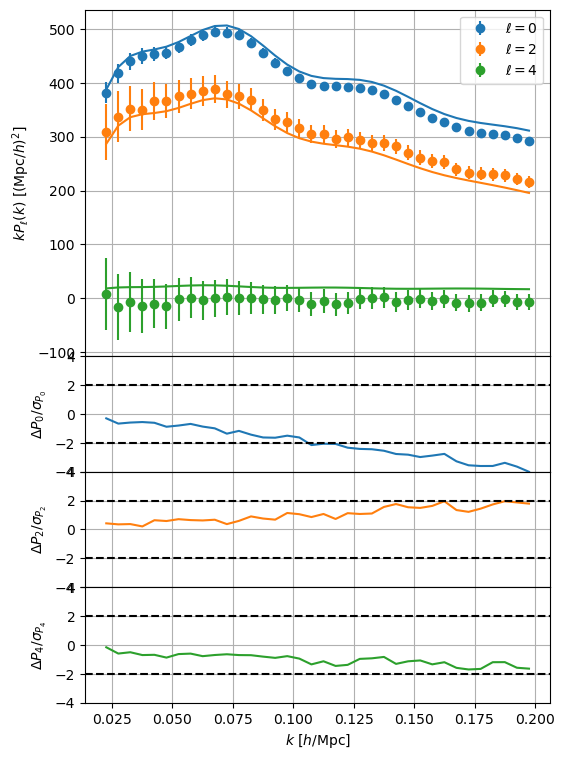

In [6]:
likelihood = get_power_likelihood(fc=False)
likelihood.solved_default = '.best'
likelihood(**profiles_complete.bestfit.choice(varied=True))
likelihood.observables[0].plot()
plt.savefig('pk_fit_ELG_NGC.png', dpi=200)

In [9]:
#plotting.plot_aligned_stacked(profiles_complete)

Removed no burn in
Removed no burn in
Removed no burn in


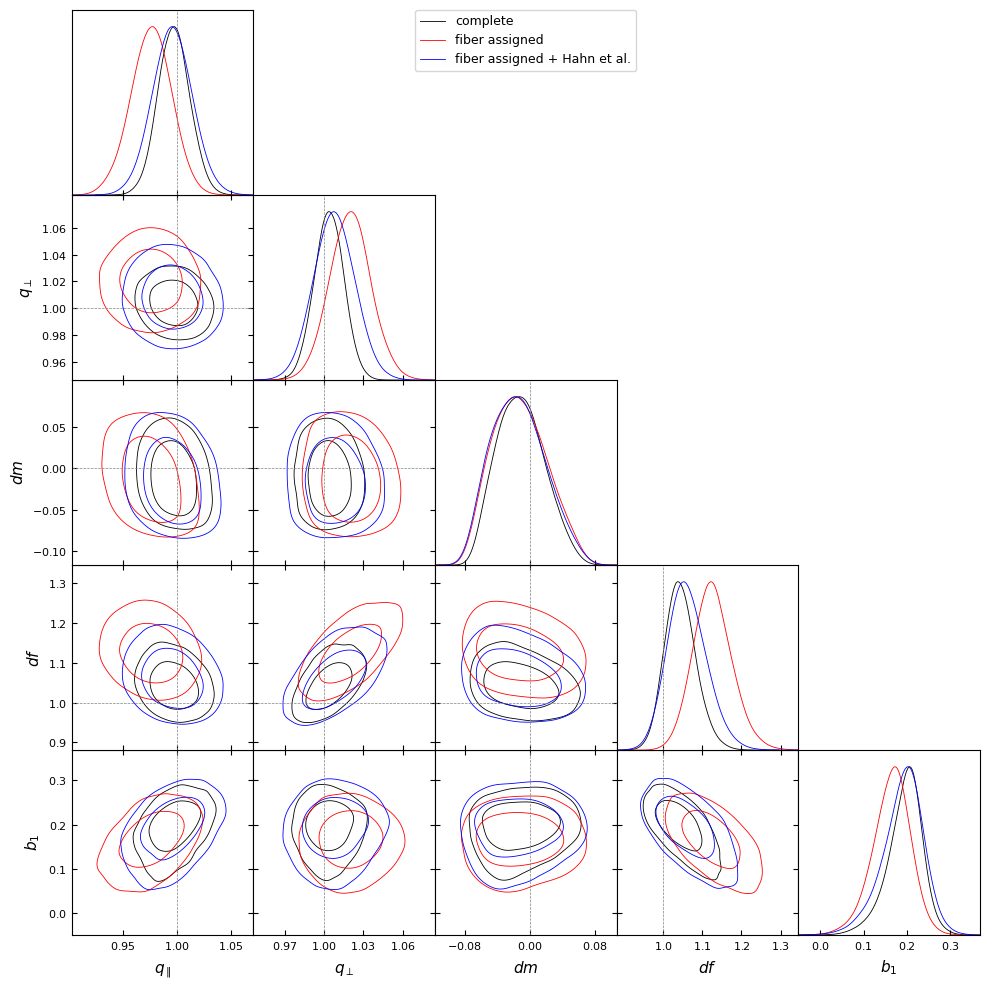

In [10]:
chain_complete = Chain.concatenate([Chain.load('chains_shapefit_complete_NGC/power_velocileptors_{:d}.npy'.format(i)).remove_burnin(0.5)[::10] for i in range(8)])
chain = Chain.concatenate([Chain.load('chains_shapefit_NGC/power_velocileptors_{:d}.npy'.format(i)).remove_burnin(0.5)[::10] for i in range(8)])
chain_fc = Chain.concatenate([Chain.load('chains_shapefit_NGC/power_velocileptors_fc_{:d}.npy'.format(i)).remove_burnin(0.5)[::10] for i in range(8)])
markers = {'qpar': 1., 'qper': 1., 'df': 1., 'dm': 0.}
plotting.plot_triangle([chain_complete, chain, chain_fc], params=['qpar', 'qper', 'df', 'dm', 'b1'], labels=['complete', 'fiber assigned', 'fiber assigned + Hahn et al.'], markers=markers, show=True)